#### Задание 1

+ Можно ли узнать, сколько лайков у комментария?
+ Подсказка: изучите документацию метода ```wall.getComments```, обратите внимание на параметр ```need_likes``` (https://vk.com/dev/wall.getComments)

#### Задание 2

+ Скачайте список пользователей, состоящих в группе https://vk.com/dormitory8hse. 
+ Постройте столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.

In [5]:
import requests
import json
from tqdm.auto import tqdm

In [2]:
offsets = [0, 1000, 2000, 3000, 4000, 5000, 6000]
users = set()
token = 'your-token'
version = '5.92'
group = 'dormitory8hse'

for off in offsets:
    data = requests.get(
        'https://api.vk.com/method/groups.getMembers',
        params={
            'group_id': group,
            'access_token': token,
            'v': version,
            'offset': off
        }
    ).json()
    users = users | set(data['response']['items'])
len(users)

5526

In [6]:
cities = []
i = 0
for user in tqdm(users):
    if i > 1000:
        break

    data = requests.get(
        'https://api.vk.com/method/users.get',
        params={
            'user_ids': user,
            'fields': 'home_town',
            'access_token': token,
            'v': version
        }
    ).json()
    
    if 'home_town' not in (data['response'][0]):
        continue
    
    cities.append(data['response'][0]['home_town'])
    i += 1

print(len(cities))

1001


In [7]:
cities = [city for city in cities if city != '']
from collections import Counter
cities = Counter(cities)

In [8]:
cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2}
sorted(cities.items(), key=lambda x: x[1], reverse=True)
# lambda signifies an anonymous function. In this case, this function takes the single argument x and returns x[1] (i.e. the item at index 1 in x). 

[('Москва', 43),
 ('Ташкент', 14),
 ('Санкт-Петербург', 13),
 ('Новосибирск', 12),
 ('Челябинск', 12),
 ('Пермь', 10),
 ('Воронеж', 10),
 ('Ижевск', 9),
 ('Самара', 9),
 ('Ростов-на-Дону', 8),
 ('Брянск', 8),
 ('Красноярск', 8),
 ('Саратов', 8),
 ('Казань', 8),
 ('Екатеринбург', 8),
 ('Киров', 8),
 ('Чебоксары', 8),
 ('Уфа', 7),
 ('Тирасполь', 7),
 ('Тольятти', 6),
 ('Набережные Челны', 6),
 ('Омск', 6),
 ('Нижний Новгород', 5),
 ('Бишкек', 5),
 ('Тамбов', 4),
 ('Тверь', 4),
 ('Павлодар', 4),
 ('Караганда', 4),
 ('Томск', 4),
 ('Балаково', 4),
 ('Йошкар-Ола', 4),
 ('Рязань', 4),
 ('Кишинев', 4),
 ('Курск', 4),
 ('Moscow', 4),
 ('Обнинск', 3),
 ('Одинцово', 3),
 ('Иваново', 3),
 ('Пенза', 3),
 ('Коломна', 3),
 ('Калининград', 3),
 ('Владикавказ', 3),
 ('Тула', 3),
 ('Ереван', 3),
 ('Бийск', 3),
 ('Волжский', 3),
 ('Рыбинск', 3),
 ('Таганрог', 3),
 ('Курган', 3),
 ('Ставрополь', 3)]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')

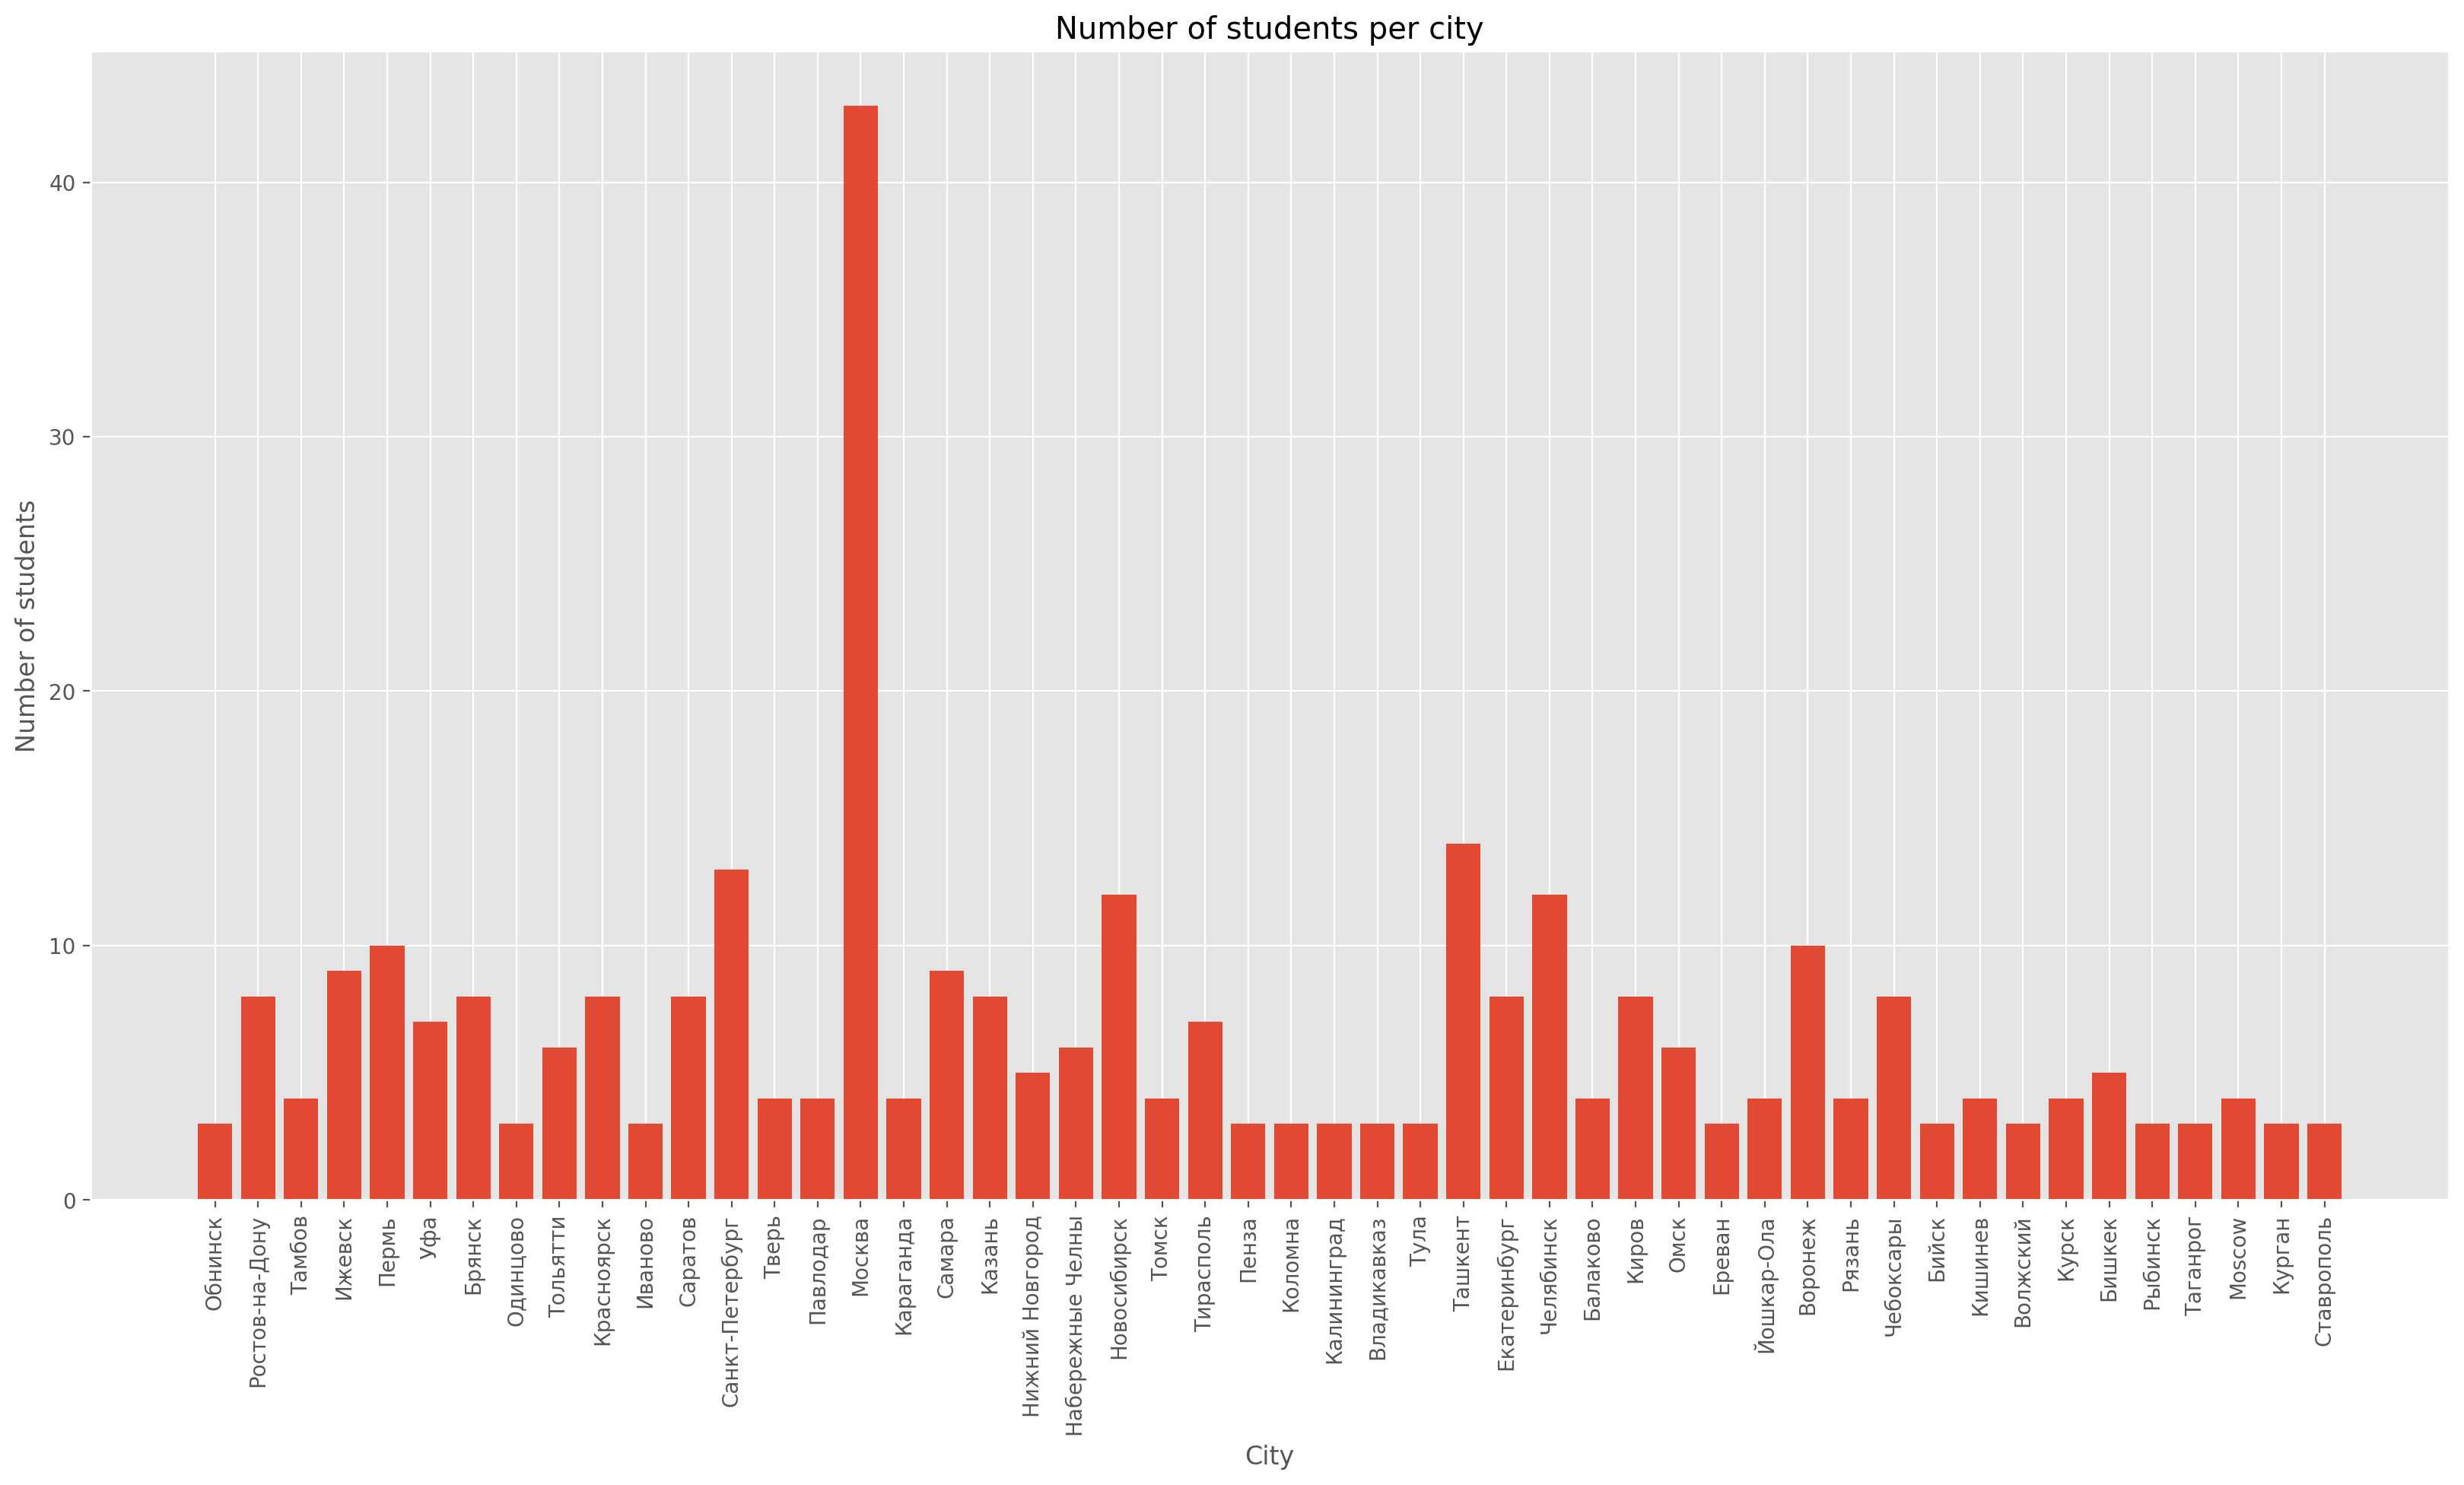

In [12]:
city_nums = [cities[city] for city in cities]
city_labs = [city for city in cities]
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(range(len(city_labs)), city_nums)

plt.title('Number of students per city')
plt.ylabel('Number of students')
plt.xlabel('City')
plt.xticks(range(len(city_labs)), city_labs, rotation=90)
#plt.legend()
plt.show()

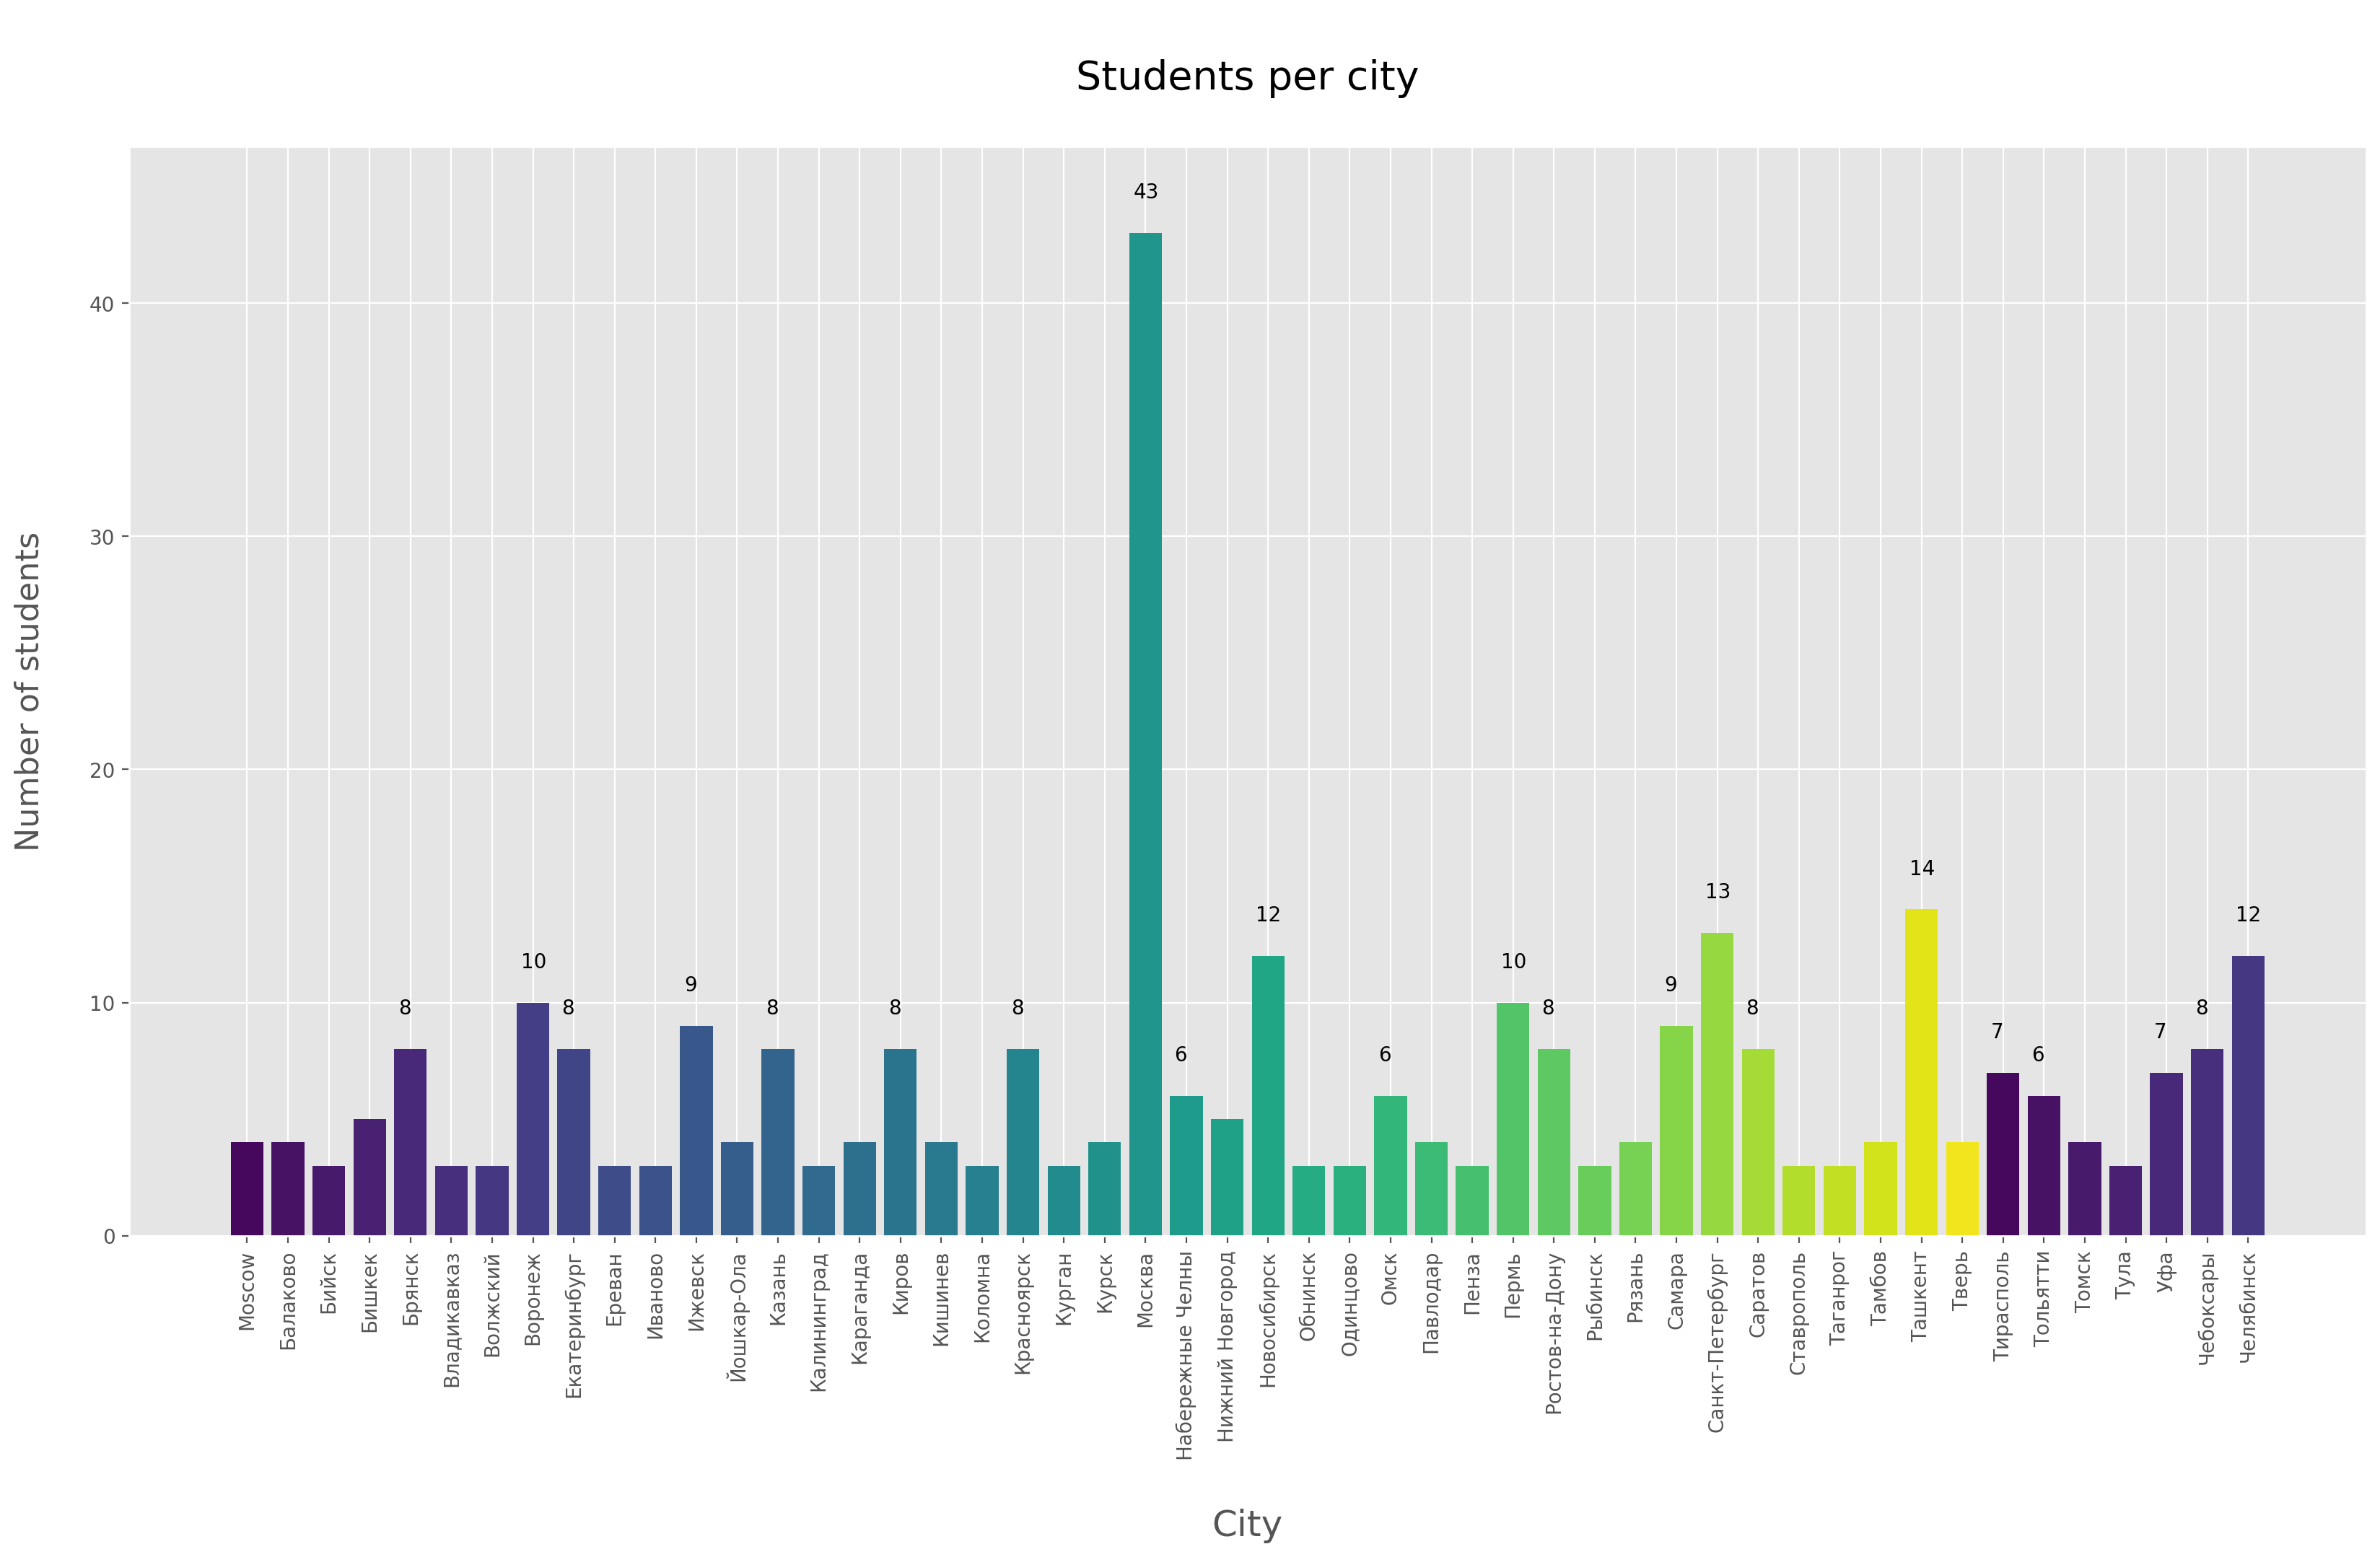

In [13]:
city_nums = [c[1] for c in sorted(cities.items(), key=lambda x: x[0], reverse=False)] # the data on the Y-axis
city_labs = sorted([city for city in cities]) # the X-axis labels # sorting the names of the cities alphabetically
x = range(len(city_labs)) # the data on the X-axis

# setting the palette
colors = sns.color_palette('viridis', max(city_nums)) 

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, city_nums, color=colors)

# drawing the number of students
for a, b in zip(x, city_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nStudents per city\n',  fontsize=20)
plt.ylabel('Number of students\n',  fontsize=16)
plt.xlabel('\nCity',  fontsize=18)
plt.xticks(x, city_labs, rotation=90)
plt.show()

#### Задание 3

+ Скачайте примерно сто постов примерно ста пользователей из Москвы и Петербурга и посторойте диаграмму распределения у них слов Питерского сленга (например, 'поребрик', 'кура', 'бадлон')
+ Можно написать полностью свой код, можно отредактировать код, который лежит [тут](https://github.com/hse-python-2nd-2019/seminars/blob/master/different_api/VK_API_Examples_Task3.ipynb) (соответствующий файл с данными [тут](https://github.com/hse-python-2nd-2019/seminars/blob/master/different_api/data.csv))
+ Если появляется ошибка 6 (https://vk.com/dev/errors), слишком много запросов в секунду, не забывайте про опцию ```time.sleep ()``` модуля ```time```

#### Задание 4

+ Скачайте список пользователей, состоящих в группе https://vk.com/hse_university. Постройте столбчатую диаграмму, показывающую распределение пользователей по их году рождения.
+ Найдите, сколько в этой группе состоит пользователей, чьим университетом является не Вышка. Постройте диаграмму, показывающую распределение этих пользователей по университетам (если все не влезут, то 10 самых частотных университетов).
+ Соберите корпус записей в группе Вышки и комментариев к ним (можно взять первые 10000 записей). Найдите самые частотные биграммы в этом корпусе.